In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import auc
from sklearn.metrics import fbeta_score

from prettytable import PrettyTable

import matplotlib.pyplot as plt

In [6]:
X_train = pd.read_csv('../2_INPUT_DATA/3_SPLIT/X_train.csv')
Y_train = pd.read_csv('../2_INPUT_DATA/3_SPLIT/Y_train.csv')
X_test = pd.read_csv('../2_INPUT_DATA/3_SPLIT/X_test.csv')
Y_test = pd.read_csv('../2_INPUT_DATA/3_SPLIT/Y_test.csv')
ids_test = pd.read_csv('../2_INPUT_DATA/3_SPLIT/ids_test.csv')
feature_names = pd.read_csv('../2_INPUT_DATA/2_FEATURE_PROCESSED/feature_names.csv')

print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("Y_test", Y_test.shape)
print("ids_test",ids_test.shape)
print("feature names", feature_names.shape)

X_train (246008, 239)
Y_train (246008, 1)
Y_test (61503, 1)
ids_test (246008, 1)
feature names (239, 1)


In [7]:
test = X_train.copy()
test["ID"] = ids_test
test.set_index("ID", inplace=True)
ids_test.iloc[5]
test.loc[100008].values.tolist()

[0,
 0,
 1,
 0,
 99000.0,
 490495.5,
 27517.5,
 454500.0,
 0.035792,
 16941,
 -1588.0,
 -4970.0,
 -477,
 0.0,
 1,
 1,
 1,
 1,
 1,
 0,
 2.0,
 2,
 2,
 16,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0.3542247319929012,
 0.6212263380626669,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -2536.0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False

In [53]:
type(X_train)

pandas.core.frame.DataFrame

In [5]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy import where
from matplotlib import pyplot

def SMOTE_transformation(X, y):
    # summarize class distribution
    counter = Counter(y)
    print(counter)
    # define pipeline
    over = SMOTE(sampling_strategy=0.1)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    # transform the dataset
    X, y = pipeline.fit_resample(X, y)
    # summarize the new class distribution
    counter = Counter(y)
    print(counter)
    # scatter plot of examples by class label
    #for label, _ in counter.items():
    #    print(label)
    #    row_ix = where(y == label)[0]
    #    print(row_ix)
    #    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
        
    #pyplot.legend()
    #pyplot.show()
    
    return X, y

x_train_smote, y_train_smote = SMOTE_transformation(X_train, Y_train['TARGET'])

Counter({0: 226067, 1: 19941})
Counter({0: 45212, 1: 22606})


## Metrics

**Fbeta Score**

![alt text for screen readers](IMAGES/fbetascore.png "Fbeta Score")

A smaller beta value, such as 0.5, gives more weight to precision and less to recall, whereas a larger beta value, such as 2.0, gives less weight to precision and more weight to recall in the calculation of the score.

#### FN et FP  
Vous pourrez supposer, par exemple, que le coût d’un FN est dix fois supérieur au coût d’un FP.  
Vous créerez un score “métier” (minimisation du coût d’erreur de prédiction des FN et FP) pour comparer les modèles, afin de choisir le meilleur modèle et ses meilleurs hyperparamètres.

**Precision**  
(tp / (tp + fp))
It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.  

**Recall** is the same as sensitivity.
(tp / (tp + fn)    
Recall describes how good the model is at predicting the positive class when the actual outcome is positive.


We want to optimize recall.

In [3]:


def fbeta_score_calculation(y_true, y_pred):
    fbeta_macro = fbeta_score(y_true, y_pred, average='macro', beta=2)
    fbeta_micro = fbeta_score(y_true, y_pred, average='micro', beta=2)
    fbeta_weighted = fbeta_score(y_true, y_pred, average='weighted', beta=2)
    return round(fbeta_macro,2), round(fbeta_micro,2), round(fbeta_weighted,2)

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
def reminder_TP(TN="", FP="", FN="", TP=""):
    #tn, fp, fn, tp
    # Create a PrettyTable instance
    table = PrettyTable()

    # Define columns and headers
    table.field_names = ['Confusion Matrix', 'Positive prediction', 'Negative prediction']

    # Add rows
    table.add_row(['Positive class', 'True positive (TP)', 'False negative (FN)'])
    table.add_row(['Negative class', 'False positive (FP)', 'True negative (TN)'])

    # Print the table
    print(table)
    
    if TN :
        # Create a PrettyTable instance
        table2 = PrettyTable()

        # Define columns and headers
        table2.field_names = ['Confusion Matrix', 'Positive prediction', 'Negative prediction']

        # Add rows
        table2.add_row(['Positive class', TP, FN])
        table2.add_row(['Negative class', FP, TN])

        # Print the table
        print(table2)
    

def generate_recall_precision_curve(model, X_test, Y_test):
    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # predict class values
    yhat = model.predict(X_test)
    lr_precision, lr_recall, _ = precision_recall_curve(Y_test, lr_probs)
    lr_f1, lr_auc = f1_score(Y_test, yhat), auc(lr_recall, lr_precision)
    # summarize scores
    print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    no_skill = len(Y_test[Y_test==1]) / len(Y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    pass

def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

def generate_model_report(model, model_name, X_test, Y_test):
    
    Y_Test_Pred_best_param = model.predict(X_test)
    
    generate_auc_roc_curve(model, X_test)
    generate_recall_precision_curve(model, X_test, Y_test)
    
    #cm_tab = pd.crosstab(pd.Series(Y_Test_Pred_best_param, name = 'Predicted'), 
     #       pd.Series(Y_test, name = 'Actual'))
    #print(cm_tab)
    
    cm = confusion_matrix(np.array(Y_test), Y_Test_Pred_best_param  )
    tn, fp, fn, tp = cm.ravel()
    reminder_TP(tn, fp, fn, tp)
    
    roc_auc = roc_auc_score(np.array(Y_test), Y_Test_Pred_best_param)

    bu_Sc = fp + (10*fn) #business score FN cost 10 times more than fp
    ac_Sc = accuracy_score(np.array(Y_test), Y_Test_Pred_best_param)
    pr_Sc = precision_score(np.array(Y_test), Y_Test_Pred_best_param)
    re_Sc = recall_score(np.array(Y_test), Y_Test_Pred_best_param)
    F1_Sc = f1_score(np.array(Y_test), Y_Test_Pred_best_param)
    fbeta_macro, fbeta_micro, fbeta_weighted = fbeta_score_calculation(np.array(Y_test), Y_Test_Pred_best_param)
    print('ROC AUC: ', roc_auc)
    print("Accuracy = " , accuracy_score(np.array(Y_test), Y_Test_Pred_best_param))
    print("Precision = " ,precision_score(np.array(Y_test), Y_Test_Pred_best_param))
    print("Recall = " ,recall_score(np.array(Y_test), Y_Test_Pred_best_param))
    print("F1 Score = " ,f1_score(np.array(Y_test), Y_Test_Pred_best_param))
    print("Fbeta Score = " ,fbeta_score_calculation(np.array(Y_test), Y_Test_Pred_best_param))
    
    metrics = pd.DataFrame({'model': model_name,'tn': [tn], 'fp': [fp], 'fn': [fn], 'tp': [tp],'FP+10*FN': bu_Sc,
                            'accuracy': [ac_Sc], 
                            'ROC_AUC': [roc_auc],
                            'precision': [pr_Sc],
                            'recall': [re_Sc],
                            'F1_Score': [F1_Sc],
                            'Fbeta_macro':[fbeta_macro], 
                            'Fbeta_micro':[fbeta_micro],
                            'Fbeta_weighted':[fbeta_weighted]
                            })
    print(metrics)
    
    return metrics 

In [4]:
def RFC_model(X_train, Y_train):
    # Define the RandomForestClassifier
    rf_classifier = RandomForestClassifier()

    # Define the hyperparameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Create the GridSearchCV object
    grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Perform the grid search on the training data
    grid_search.fit(X_train, Y_train)

    # Get the best hyperparameters from the grid search
    best_params = grid_search.best_params_

    # Train the RandomForestClassifier with the best hyperparameters on the entire training set
    best_rf_classifier = RandomForestClassifier(**best_params)
    best_rf_classifier.fit(X_train, Y_train)

    # Make predictions on the test set
    y_pred = best_rf_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(Y_test, y_pred)
    print(f'Best Hyperparameters: {best_params}')
    print(f'Accuracy on Test Set: {accuracy}')
    
    return best_rf_classifier, best_params

**RFC on Smote data set**

In [10]:
RFC_model_smote, best_params_smote = RFC_model(x_train_smote, y_train_smote)

/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy on Test Set: 0.8828349836593337


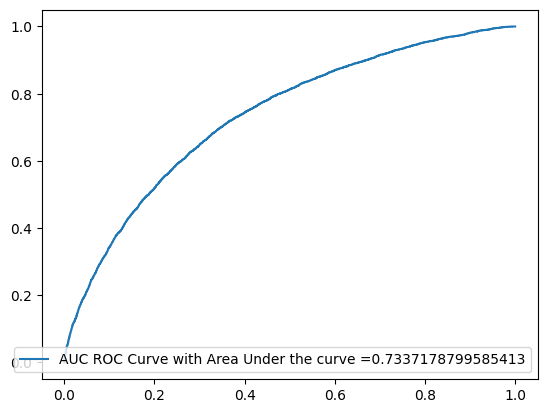

Logistic: f1=0.253 auc=0.210


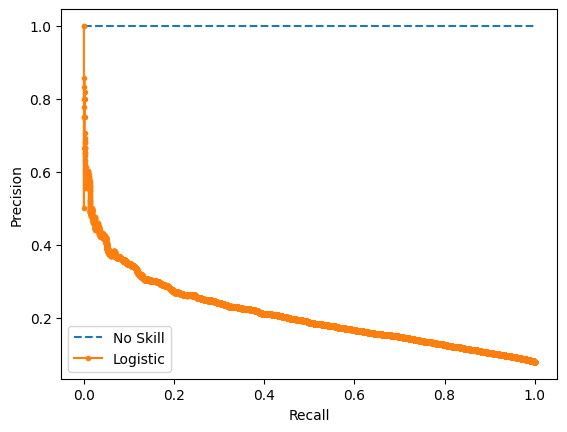

+------------------+---------------------+---------------------+
| Confusion Matrix | Positive prediction | Negative prediction |
+------------------+---------------------+---------------------+
|  Positive class  |  True positive (TP) | False negative (FN) |
|  Negative class  | False positive (FP) |  True negative (TN) |
+------------------+---------------------+---------------------+
+------------------+---------------------+---------------------+
| Confusion Matrix | Positive prediction | Negative prediction |
+------------------+---------------------+---------------------+
|  Positive class  |         1222        |         3662        |
|  Negative class  |         3544        |        53075        |
+------------------+---------------------+---------------------+
ROC AUC:  0.5938054606390324
Accuracy =  0.8828349836593337
Precision =  0.2563994964330676
Recall =  0.2502047502047502
F1 Score =  0.2532642487046632
Fbeta Score =  (0.59, 0.88, 0.88)
  model     tn    fp    fn    tp  

In [12]:
result_smote = generate_model_report(RFC_model_smote, "RFC", X_test, Y_test)

**Test RFC on original data set**

In [5]:
RFC_model, best_params = RFC_model(X_train, Y_train)

/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1

/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y wa

/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y wa

/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y wa

/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y wa

/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y wa

/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y wa

/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/markobriesemann/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y wa

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on Test Set: 0.920556720810367


In [11]:
feature_names.iloc[:,0].values.tolist()

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG'

In [12]:
# Accessing feature importance
feature_importance = RFC_model.feature_importances_

# Printing feature importance for each feature
for i, feature_name in enumerate(feature_names.iloc[:,0].values.tolist()):
    print(f'Feature: {feature_name}, Importance: {feature_importance[i]}')

Feature: NAME_CONTRACT_TYPE, Importance: 0.001957730975090701
Feature: FLAG_OWN_CAR, Importance: 0.004152092040479087
Feature: FLAG_OWN_REALTY, Importance: 0.005525288692862896
Feature: CNT_CHILDREN, Importance: 0.007688592504856424
Feature: AMT_INCOME_TOTAL, Importance: 0.026229721173933476
Feature: AMT_CREDIT, Importance: 0.028958138457014705
Feature: AMT_ANNUITY, Importance: 0.031096520888708103
Feature: AMT_GOODS_PRICE, Importance: 0.02585103457947628
Feature: REGION_POPULATION_RELATIVE, Importance: 0.025870898664867317
Feature: DAYS_BIRTH, Importance: 0.034571535007287456
Feature: DAYS_EMPLOYED, Importance: 0.02971849750273892
Feature: DAYS_REGISTRATION, Importance: 0.03342144767701012
Feature: DAYS_ID_PUBLISH, Importance: 0.0345094192456134
Feature: OWN_CAR_AGE, Importance: 0.012681809737832315
Feature: FLAG_MOBIL, Importance: 0.0
Feature: FLAG_EMP_PHONE, Importance: 0.0008304266699965818
Feature: FLAG_WORK_PHONE, Importance: 0.004872853548325793
Feature: FLAG_CONT_MOBILE, Import

In [24]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names.iloc[:,0].values.tolist(),
    'Importance': RFC_model.feature_importances_
})

# Sorting the DataFrame by importance scores
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the sorted DataFrame
#print(feature_importance_df_sorted.head(20))
feature_importance_df_sorted['Feature'][:20].tolist()


['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_EMPLOYED',
 'AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'TOTALAREA_MODE']

In [12]:
import joblib
joblib.dump(RFC_model, 'loan_default_model.joblib')

!pip freeze > requirements.txt

In [48]:
y_pred_proba = best_rf_classifier.predict_proba(X_test)

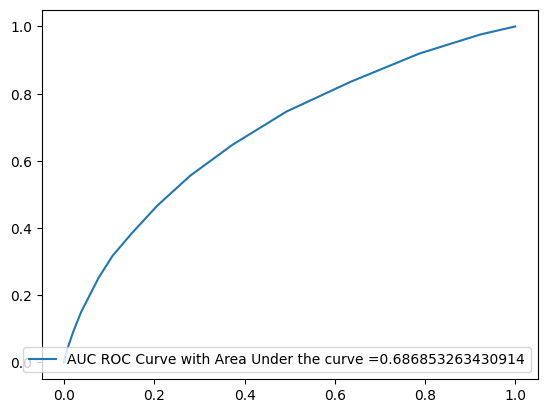

Logistic: f1=0.004 auc=0.178


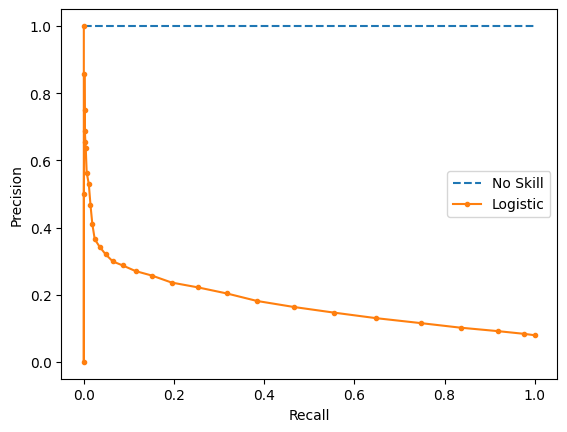

+------------------+---------------------+---------------------+
| Confusion Matrix | Positive prediction | Negative prediction |
+------------------+---------------------+---------------------+
|  Positive class  |  True positive (TP) | False negative (FN) |
|  Negative class  | False positive (FP) |  True negative (TN) |
+------------------+---------------------+---------------------+
+------------------+---------------------+---------------------+
| Confusion Matrix | Positive prediction | Negative prediction |
+------------------+---------------------+---------------------+
|  Positive class  |          9          |         4875        |
|  Negative class  |          3          |        56616        |
+------------------+---------------------+---------------------+
ROC AUC:  0.5008948830479588
Accuracy =  0.9206867957660602
Precision =  0.75
Recall =  0.0018427518427518428
F1 Score =  0.0036764705882352945
Fbeta Score =  (0.49, 0.92, 0.91)
  model     tn  fp    fn  tp  FP+10*FN  ac

,model,tn,fp,fn,tp,FP+10*FN,accuracy,ROC_AUC,precision,recall,F1_Score,Fbeta_macro,Fbeta_micro,Fbeta_weighted
0,RFC,56616,3,4875,9,48753,0.920687,0.500895,0.75,0.001843,0.003676,0.49,0.92,0.91


In [46]:
generate_model_report(best_rf_classifier, "RFC", X_test, Y_test)

In [87]:
def find_optimal_business_score(predictions_proba, Y_true):
    
    print("prediction proba", len(predictions_proba))
    print("Y_true", len(Y_true))

    # Threshold values from 0 to 0.5
    threshold_values = [i / 10 for i in range(6)]
    best_B_score = 100000
    
    # Create an empty DataFrame to store results
    results_df = pd.DataFrame(columns=['threshold', 'tn', 'fp', 'fn', 'tp', 'FP+10*FN', 'accuracy', 'ROC_AUC', 'precision', 'recall', 'F1_Score', 'Fbeta_macro', 'Fbeta_micro', 'Fbeta_weighted','best'])

    # Loop through threshold values
    for threshold in threshold_values:
        best = 0
        # Convert probabilities to binary predictions based on threshold
        predicted_labels = [1 if x[1] >= threshold else 0 for x in predictions_proba]

        # Calculate confusion matrix and other metrics
        cm = confusion_matrix(Y_true, predicted_labels)
        tn, fp, fn, tp = cm.ravel()
        
        FP_10_FN = fp + 10 * fn
        precision = precision_score(Y_true, predicted_labels)
        recall = recall_score(Y_true, predicted_labels)
        accuracy = accuracy_score(Y_true, predicted_labels)
        roc_auc = roc_auc_score(Y_true, predicted_labels)
        f1 = f1_score(Y_true, predicted_labels)
        fbeta_macro = fbeta_score(Y_true, predicted_labels, beta=2, average='macro')
        fbeta_micro = fbeta_score(Y_true, predicted_labels, beta=2, average='micro')
        fbeta_weighted = fbeta_score(Y_true, predicted_labels, beta=2, average='weighted')

        # best param
        if (best_B_score > FP_10_FN ):
            print(results_df[results_df['best']==1]['best'])
            results_df.loc[(results_df['best']==1),'best']  = 0
            best_B_score = FP_10_FN
            best = 1
        
        
        # Create a DataFrame for the current threshold iteration
        data = {'threshold': [threshold],
                'tn': [tn],
                'fp': [fp],
                'fn': [fn],
                'tp': [tp],
                'FP+10*FN': [FP_10_FN],
                'accuracy': [accuracy],
                'ROC_AUC': [roc_auc],
                'precision': [precision],
                'recall': [recall],
                'F1_Score': [f1],
                'Fbeta_macro': [fbeta_macro],
                'Fbeta_micro': [fbeta_micro],
                'Fbeta_weighted': [fbeta_weighted],
                'best': best
               }

        threshold_df = pd.DataFrame(data)

        # Concatenate the current threshold results to the overall results DataFrame
        results_df = pd.concat([results_df, threshold_df], ignore_index=True)
        
    print("best b score", best_B_score, results_df[results_df['best']==1]['threshold'])
    print(results_df)
    return results_df

In [88]:
test_metrics = find_optimal_business_score(y_pred_proba, Y_test)
metrics_domain = { "train": metrics["train"][5], 
                  "valid": metrics["valid"][5],
                  "TN":metrics_FN_FP["TN"][0],
                  "FP":metrics_FN_FP["FP"][0],
                  "FN":metrics_FN_FP["FN"][0],
                  "TP":metrics_FN_FP["TP"][0],
                  "Accuracy": accuracy,
                 "F1":f1}
print(metrics_domain)

prediction proba 61503
Y_true 61503
Series([], Name: best, dtype: object)
0    1
Name: best, dtype: object
best b score 38323 1    0.1
Name: threshold, dtype: float64
   threshold     tn     fp    fn    tp FP+10*FN  accuracy   ROC_AUC  \
0        0.0      0  56619     0  4884    56619  0.079411  0.500000   
1        0.1  35476  21143  1718  3166    38323  0.628295  0.637407   
2        0.2  52293   4326  3650  1234    40826  0.870315  0.588128   
3        0.3  55883    736  4570   314    46436  0.913728  0.525646   
4        0.4  56537     82  4812    72    48202  0.920427  0.506647   
5        0.5  56614      5  4873    11    48735  0.920687  0.501082   

   precision    recall  F1_Score  Fbeta_macro  Fbeta_micro  Fbeta_weighted  \
0   0.079411  1.000000  0.147137     0.150668     0.079411        0.023929   
1   0.130240  0.648239  0.216901     0.516890     0.628295        0.647983   
2   0.221942  0.252662  0.236308     0.585831     0.870315        0.871810   
3   0.299048  0.064292 

## MLflow

In [ ]:
 #mlflow
  
print("Save model with MLflow")
signature = infer_signature(domain_features, train_labels)
mlflow.sklearn.save_model(model, 'mlflow_model_RF', signature=signature)


experiment_name = "RF_Models_01"  
run_name = "RF_01_testMLflow"
run_MLflow(experiment_name, run_name, metrics_domain, best_params)

In [ ]:
client = MlflowClient(tracking_uri="http://127.0.0.1:8080/")
# Provide an Experiment description that will appear in the UI
experiment_description = (
    "This is the credit score project. "
    "This experiment contains the basic LightGBM model."
)

# Provide searchable tags that define characteristics of the Runs that
# will be in this Experiment
experiment_tags = {
    "project_name": "credit-score-classification",
    "store_dept": "Prêt à dépenser",
    "team": "cred-ml",
    "project_quarter": "Q1-2024",
    "mlflow.note.content": experiment_description,
}

# Create the Experiment, providing a unique name
credit_classification_LightGBM_experiment = client.create_experiment(
    name="LightGBM_Models_01", tags=experiment_tags
)

In [ ]:



def run_MLflow(experiment_name, run_name, metrics, params, model_obj, X_val, signature):

    # Sets the current active experiment to the "LightGBM_Models" experiment and
    # returns the Experiment metadata
    LightGBM_experiment = mlflow.set_experiment("LightGBM_Models_01")

    # Define an artifact path that the model will be saved to.
    artifact_path = "LGBM_test"

    # Assemble the metrics we're going to write into a collection
    #metrics = { "train": metrics_domain["train"][5], "valid": metrics_domain["valid"][5]}
    print(metrics)

    # Define a run name for this iteration of training.
    # If this is not set, a unique name will be auto-generated for your run.
    run_name = run_name

    # Initiate the MLflow run context
    with mlflow.start_run(run_name=run_name) as run:
        # Log the parameters used for the model fit
        mlflow.log_params(params)

        # Log the error metrics that were calculated during validation
        mlflow.log_metrics(metrics)

        # Log an instance of the trained model for later use
        mlflow.sklearn.log_model(
            sk_model=model_obj, input_example=X_val, artifact_path=artifact_path
        )
        # Auto log all MLflow entities
        #mlflow.lightgbm.autolog()
        #model_info = mlflow.lightgbm.log_model(model, artifact_path, signature=signature)

        

best_params = PARAMS
experiment_name = "LightGBM_Models_02"  
run_name = "LightGBM_05_testMLflow_avecSignature_F1_accuracy"
#run_MLflow(experiment_name, run_name, metrics_domain, best_params)
run_MLflow(experiment_name, run_name, metrics_domain, best_params, model_LGBM, X_train, signature)
#run_MLflow(experiment_name, run_name, metrics_domain, best_params)

Test MLflow

In [68]:
!curl http://127.0.0.1:8000/predict -H 'Content-Type: application/json' -d '{"inputs": [[0, 0, 1, 1, 63000.0, 310500.0, 15232.5, 310500.0, 0.026392, 16263, -214.0, -8930.0, -573, 0.0, 1, 1, 0, 1, 1, 0, 2.0, 2, 2, 11, 0, 0, 0, 0, 1, 1, 0.0, 0.0765011930557638, 0.0005272652387098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, true, false, false, false, false, false, false, false, true, false, false, false, false, false, false, true, false, false, false, false, true, false, false, false, true, false, false, true, false, false, false, false, false, false, false, false, false, false, true, false, false, false, false, false, false, false, false, true, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false]]}'
  

{"detail":[{"type":"missing","loc":["body","data_point"],"msg":"Field required","input":{"inputs":[[0,0,1,1,63000.0,310500.0,15232.5,310500.0,0.026392,16263,-214.0,-8930.0,-573,0.0,1,1,0,1,1,0,2.0,2,2,11,0,0,0,0,1,1,0.0,0.0765011930557638,0.0005272652387098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,true,false,false,false,false,false,false,false,true,false,false,false,false,false,false,true,false,false,false,false,true,false,false,false,true,false,false,true,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,

In [100]:
!curl http://127.0.0.1:8000/predict -H 'Content-Type: application/json' -d '{"data_point": [[0, 0, 1, 1, 63000.0, 310500.0, 15232.5, 310500.0, 0.026392, 16263, -214.0, -8930.0, -573, 0.0, 1, 1, 0, 1, 1, 0, 2.0, 2, 2, 11, 0, 0, 0, 0, 1, 1, 0.0, 0.0765011930557638, 0.0005272652387098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, true, false, false, false, false, false, false, false, true, false, false, false, false, false, false, true, false, false, false, false, true, false, false, false, true, false, false, true, false, false, false, false, false, false, false, false, false, false, true, false, false, false, false, false, false, false, false, true, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false]]}'


{"detail":[{"type":"float_type","loc":["body","data_point",0],"msg":"Input should be a valid number","input":[0,0,1,1,63000.0,310500.0,15232.5,310500.0,0.026392,16263,-214.0,-8930.0,-573,0.0,1,1,0,1,1,0,2.0,2,2,11,0,0,0,0,1,1,0.0,0.0765011930557638,0.0005272652387098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,true,false,false,false,false,false,false,false,true,false,false,false,false,false,false,true,false,false,false,false,true,false,false,false,true,false,false,true,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,fa

In [87]:
test = X_train.copy()
test["ID"] = ids_test
test.set_index("ID", inplace=True)
ids_test.iloc[5]
test.loc[100008].values.tolist()

[0.0,
 0.0,
 1.0,
 0.0,
 99000.0,
 490495.5,
 27517.5,
 454500.0,
 0.035792,
 16941.0,
 -1588.0,
 -4970.0,
 -477.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 2.0,
 2.0,
 2.0,
 16.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3542247319929012,
 0.6212263380626669,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -2536.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [76]:
# Select columns with data type 'int64'
int_columns = X_train.select_dtypes(include=['int64']).columns

# Convert selected columns to int
X_train[int_columns] = X_train[int_columns].astype('float')

In [84]:
# Select columns with data type 'int64'
int_columns = X_train.select_dtypes(include=['bool']).columns

# Convert selected columns to int
X_train[int_columns] = X_train[int_columns].astype('float')

In [85]:
len(int_columns)

132

In [86]:
# Select columns with data type 'int64'
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Columns: 239 entries, 0 to 238
dtypes: float64(239)
memory usage: 448.6 MB


In [116]:
data_for_request = test.loc[100020].values.tolist()

In [117]:
data_for_request

[0.0,
 0.0,
 0.0,
 0.0,
 108000.0,
 509602.5,
 26149.5,
 387000.0,
 0.018634,
 12931.0,
 -1317.0,
 -6392.0,
 -3866.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 2.0,
 2.0,
 12.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.2363778398884225,
 0.0621030378372968,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -3.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [118]:
import requests

# initialised with: mlflow models serve -m model_LGBM02/ --port 8092
#http://127.0.0.1:8092
host = '127.0.0.1'
port = '8000'

# endpoint
url = f'http://{host}:{port}/predict'
print("URI : ", url)
headers = {
    'Content-Type': 'application/json',
}

headers = {'Content-Type': 'application/json'}

# Send the POST request with the data
response = requests.post(url, json={"data_point": data_for_request})

print(f'Predictions: {response.text}')

URI :  http://127.0.0.1:8000/predict
Predictions: {"prediction":0.9281905224554439,"probability":0.8}
